In [157]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [158]:
path_rental = "Average Rents_Concat.csv"
path_units = "Number_of_Units_Concat.csv"
path_vacancy = "Vacancy Rate Concat.csv"

In [159]:
rental_df = pd.read_csv(path_rental)
units_df = pd.read_csv(path_units)
vacancy_df = pd.read_csv(path_vacancy)
rental_df.columns


Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [160]:
columns = "2 Bedroom"
Province_1 = "Ont."
df_Ontario = vacancy_df[(vacancy_df["Province"]==Province_1) & (vacancy_df[col]!=0)]
df_Ontario

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
509,Ont.,Barrie,Barrie,Downtown,Apt & Other,0.0,2.8,3.3,0.0,3.2,2018
511,Ont.,Barrie,Barrie,West End,Apt & Other,0.0,0.0,3.3,0.0,3.1,2018
513,Ont.,Barrie,Barrie,North Barrie,Apt & Other,0.0,1.7,1.4,4.1,1.8,2018
515,Ont.,Barrie,Barrie,East End,Apt & Other,0.0,4.0,3.4,0.0,3.6,2018
516,Ont.,Barrie,Barrie,South Barrie,Row,0.0,0.0,0.0,6.9,5.2,2018
...,...,...,...,...,...,...,...,...,...,...,...
8347,Ont.,Windsor,East Outer,Fontainebleau,Apt & Other,0.0,0.0,0.0,0.0,3.6,2022
8353,Ont.,Windsor,West,University,Apt & Other,0.0,0.0,0.0,0.0,1.1,2022
8355,Ont.,Windsor,West,Sandwich,Apt & Other,0.0,1.7,2.4,0.0,1.8,2022
8357,Ont.,Windsor,West,Southwest Windsor,Apt & Other,0.0,0.0,0.0,0.0,0.5,2022


In [161]:
df_Ontario.columns

Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [162]:
df_Ontario["Centre"].unique()

array(['Barrie', 'Belleville', 'Brantford', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Peterborough',
       'Greater Sudbury / Grand Sudbur', 'Thunder Bay', 'Toronto',
       'Windsor'], dtype=object)

In [163]:
df_Ontario = df_Ontario[['Centre','Year',columns]]

Centre_for_trend =['Barrie', 'Belleville', 'Brantford', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Peterborough',
       'Greater Sudbury / Grand Sudbur', 'Thunder Bay', 'Toronto',
       'Windsor']

df_Ontario = df_Ontario[(df_Ontario['Centre'].isin(Centre_for_trend))]

df_Ontario = pd.pivot_table(df_Ontario, index='Year', columns='Centre', aggfunc='mean', fill_value=0).reset_index()

df_Ontario.columns = ["Year", 'Barrie', 'Belleville', 'Brantford', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Peterborough',
       'Greater Sudbury / Grand Sudbur', 'Thunder Bay', 'Toronto',
       'Windsor']

df_Ontario.head()

,Year,Barrie,Belleville,Brantford,Guelph,Hamilton,Kingston,Kitchener - Cambridge - Waterl,London,St. Catharines - Niagara,Oshawa,Ottawa,Peterborough,Greater Sudbury / Grand Sudbur,Thunder Bay,Toronto,Windsor
0,2018,1.900000,2.380000,1.433333,2.037500,0.616667,2.843478,0.670000,2.095000,1.508333,1.014286,1.261290,1.250,1.557143,3.912500,0.885000,0.970000
1,2019,2.200000,2.940000,0.850000,0.590000,1.760000,2.556000,0.818182,1.518750,1.456000,1.050000,1.630303,1.860,1.369231,1.885714,0.915000,0.908333
2,2020,1.950000,2.733333,0.950000,0.914286,1.480000,2.891304,1.344444,1.326316,2.057692,1.300000,1.429630,3.500,1.923077,4.300000,1.786726,1.733333
3,2021,1.183333,1.825000,0.433333,0.700000,1.560000,1.943478,1.133333,1.082353,1.460000,1.533333,1.600000,0.425,0.866667,1.700000,2.341935,0.558333
4,2022,0.833333,1.475000,1.320000,0.700000,1.320000,1.463636,0.853846,0.850000,1.470833,1.560000,0.940000,0.775,1.760000,0.800000,0.908257,0.933333


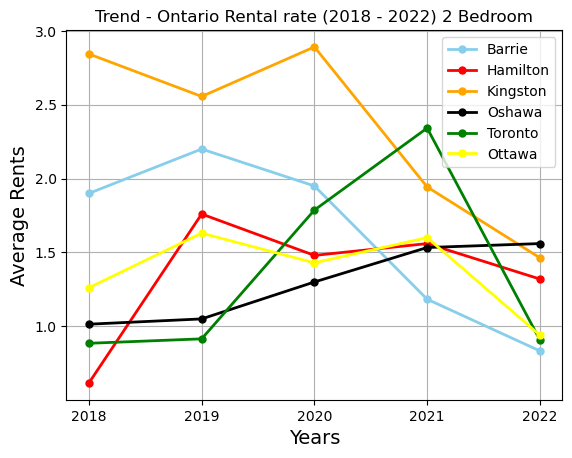

In [164]:
#plot Rent Trend:
plt.plot( 'Year', 'Barrie', data=df_Ontario, marker='o', markerfacecolor='skyblue', markersize=5, color='skyblue', linewidth=2)
plt.plot( 'Year', 'Hamilton', data=df_Ontario, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)
plt.plot( 'Year', 'Kingston', data=df_Ontario, marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=2)
plt.plot( 'Year', 'Oshawa', data=df_Ontario, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=2)
plt.plot( 'Year', 'Toronto', data=df_Ontario, marker='o', markerfacecolor='green', markersize=5, color='green', linewidth=2)
plt.plot( 'Year', 'Ottawa', data=df_Ontario, marker='o', markerfacecolor='yellow', markersize=5, color='yellow', linewidth=2)
#plt.plot( 'Year', 'Toronto', data=vr_trend_df, marker='o', markerfacecolor='green', markersize=5, color='green', linewidth=2)
plt.xticks([2018,2019,2020,2021,2022])

plt.title(f"Trend - Ontario Rental rate (2018 - 2022) {columns}",fontsize = 12)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Average Rents",fontsize = 14)
plt.grid()
plt.legend()
plt.savefig(f"Vacancy rate trend {Province_1} {columns}.png") 
plt.show()